In [1]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import os
import cv2 

(1201, 1600, 3)


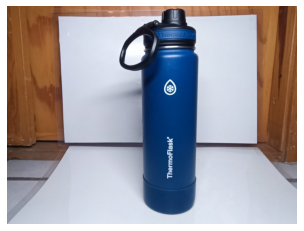

In [2]:
img = imread('../ORB_img/ImagesQuery/bottle_1.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(128, 64, 3)


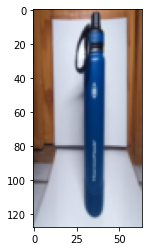

In [3]:
resized_img = resize(img, (128,64))
plt.imshow(resized_img)
print(resized_img.shape)

In [4]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

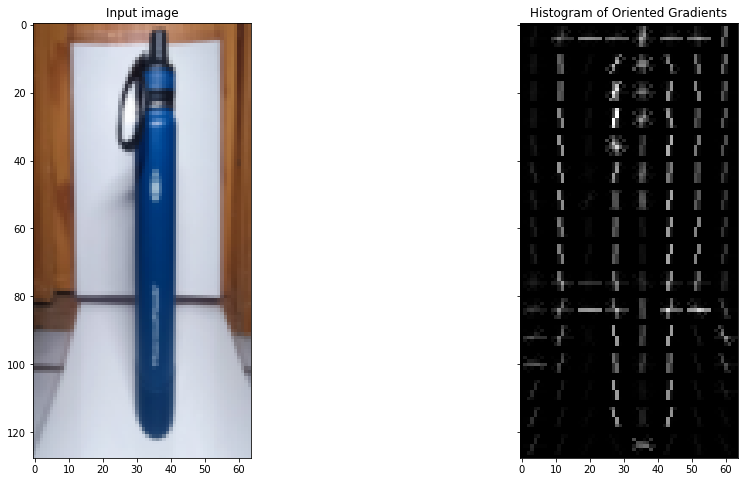

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [6]:
path = '../ORB_Img/ImagesQuery'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
print('Total Classes Detected',len(myList))
for cl in myList:
    imgCur = cv2.imread(f'{path}/{cl}',cv2.IMREAD_COLOR)
    images.append(imgCur)
    gray_img = cv2.cvtColor(imgCur,cv2.COLOR_BGR2GRAY)
    images.append(gray_img)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['bottle_1.jpg', 'bottle_10.jpg', 'bottle_11.jpg', 'bottle_12.jpg', 'bottle_2.jpg', 'bottle_3.jpg', 'bottle_4.jpg', 'bottle_5.jpg', 'bottle_6.jpg', 'bottle_7.jpg', 'bottle_8.jpg', 'bottle_9.jpg', 'FlipperTrainR.jpg', 'flipper_1.jpg', 'flipper_10.jpg', 'flipper_11.jpg', 'flipper_2.jpg', 'flipper_3.jpg', 'flipper_4.jpg', 'flipper_5.jpg', 'flipper_6.jpg', 'flipper_7.jpg', 'flipper_8.jpg', 'flipper_9.jpg', 'HaloR.jpg', 'halo_1.jpg', 'halo_10.jpg', 'halo_11.jpg', 'halo_12.jpg', 'halo_2.jpg', 'halo_3.jpg', 'halo_4.jpg', 'halo_5.jpg', 'halo_6.jpg', 'halo_7.jpg', 'halo_8.jpg', 'halo_9.jpg', 'minecraft_1.jpg', 'minecraft_2.jpg', 'minecraft_3.jpg', 'minecraft_4.jpg', 'minecraft_5.jpg', 'minecraft_6.jpg', 'minecraft_7.jpg', 'minecraft_8.jpg', 'minecraft_9.jpg', 'thermoIntR.png', 'xboxControlerQueryR.jpg', 'xbox_1.jpg', 'xbox_10.jpg', 'xbox_2.jpg', 'xbox_3.jpg', 'xbox_4.jpg', 'xbox_5.jpg', 'xbox_6.jpg', 'xbox_7.jpg', 'xbox_8.jpg', 'xbox_9.jpg']
Total Classes Detected 58
['bottle_1', 'bottle_10', '

In [7]:
def findHogImg(images):
    desList=[]
    for img in images:
        resized_img = resize(img, (128,64))
        #gray_img = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
        #kp,des = orb.detectAndCompute(resized_img,None)
        #print(gray_img.shape)
        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)#, multichannel=True
        desList.append(hog_image)
        #print("FIND_HOG")
    return desList


In [8]:
def findID(img, desLIst, thres=15):
    #kp2,des2 = orb.detectAndCompute(img,None)
    resized_img = resize(img, (128,64))
    #gray_img = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
        #kp,des = orb.detectAndCompute(resized_img,None)
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)#, multichannel=True
    bf = cv2.BFMatcher()
    matchList=[]
    finalVal = -1
    try:
        for des in desList:
            matches = bf.knnMatch(des,fd,k=2)#fd2
            good = []
            for m,n in matches:#casi fuerza bruta
                if m.distance < 0.55*n.distance:#75
                    good.append([m])
            matchList.append(len(good))
    except:
        pass    
    #print(matchList)
    if len(matchList)!=0:
        if max(matchList) > thres:
            finalVal = matchList.index(max(matchList))
    return finalVal  

In [9]:
desList = findHogImg(images)
print(len(desList))

cap = cv2.VideoCapture(0)

while True:
    succes, img2 = cap.read()
    imgOriginal = img2#.copy()
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    id = findID(img2,desList)
    if id != -1:
        cv2.putText(imgOriginal,classNames[id],(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    cv2.imshow('img2',imgOriginal)
    cv2.waitKey(1)
    #Usualemnte tarda unos 20 seg


116


### Trabajos recomendados para este tipo de tareas:
- https://github.com/Ahtasham18/Cats_Dog_Classification_using_HOG_-_SVM/blob/main/Cats%26Dogs_Classification_HOG_SVM.ipynb
- https://medium.com/swlh/histogram-of-oriented-gradients-hog-for-multiclass-image-classification-and-image-recommendation-cf0ea2caaae8
- https://stackoverflow.com/questions/19224300/python-opencv-classify-gender-using-orb-features-and-knn

A modo de resumen, o se utiliza SVM o KNN una fuerza bruta por tiempo de respuesta y cambio de imagenes en tiempo real no es sugerente.

- https://debuggercafe.com/image-recognition-using-histogram-of-oriented-gradients-hog-descriptor/
- https://medium.com/swlh/histogram-of-oriented-gradients-hog-for-multiclass-image-classification-and-image-recommendation-cf0ea2caaae8
- https://github.com/Ravi8275/Classification-using-HOG-and-Compass-Gradient-Features/blob/main/Classification%20Using%20HOG%20and%20Compass%20Gradient%20Features.ipynb
- https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f
- https://answers.opencv.org/question/220955/invalid-number-of-channels-in-input-image-vscncontainsscn-scn-is-1/
- https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/